## Model simulation: Biochemical reactor with Monod kinetics

$$\frac{dX}{dt}= \mu_{max}\frac{S}{K_{S}+S}X - \frac{Q}{V}X$$

$$\frac{dS}{dt}= -\frac{1}{Y} \mu_{max}\frac{S}{K_{S}+S}X + \frac{Q}{V}(S_{in} - S)$$

In [1]:
%matplotlib inline

# Importer all functionalities
import numpy as np
import scipy as sp
import pandas as pd
import math
from IPython.display import Image
from ipywidgets import interact, fixed, FloatSlider, IntSlider, ToggleButtons, Layout

%load_ext autoreload
%autoreload 1
import sys
import os
sys.path.append("functions")
%aimport general_functions


In [2]:
%aimport monod
function_derivatives = monod.model_derivatives

## Model simulation

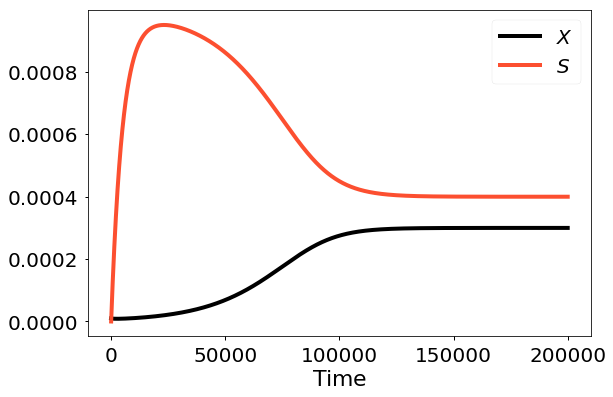

In [3]:
df = general_functions.model(
    np.arange(0, 200000, 10), # Timesteps
    [1e-5, 0], # Initial conditions
    [r'$X$',r'$S$'], # Variable names
    function_derivatives, # Function derivatives
    returnDataFrame=True, plotresults=True,
    # Specify parameter values
    mu_max=3e-4, Q=1, V=5000, Y=0.5, K_S=2e-4, S_in=0.001)

$$\frac{dX}{dt}= \mu_{max}\frac{S}{K_{S}+S}X - \frac{Q}{V}X$$

$$\frac{dS}{dt}= -\frac{1}{Y} \mu_{max}\frac{S}{K_{S}+S}X + \frac{Q}{V}(S_{in} - S)$$

## Impact of initial conditions

In [4]:
def interactive_model(logX, logS):
    general_functions.model(
        np.arange(0, 200000, 10), # Timesteps
        [10**logX, 10**logS], # Initial conditions
        [r'$X$',r'$S$'], # Variable names
        function_derivatives, # Function derivatives
        returnDataFrame=True, plotresults=True,
        # Specify parameter values
        mu_max=3e-4, Q=1, V=5000, Y=0.5, K_S=2e-4, S_in=0.001)
interact(interactive_model,
        logX=IntSlider(value=-5, min=-6, max=0, step=1, description=r'log(X)', continuous_update=False),
        logS=IntSlider(value=-6, min=-6, max=0, step=1, description=r'log(S)', continuous_update=False));

interactive(children=(IntSlider(value=-5, continuous_update=False, description='log(X)', max=0, min=-6), IntSl…

$$\frac{dX}{dt}= \mu_{max}\frac{S}{K_{S}+S}X - \frac{Q}{V}X$$

$$\frac{dS}{dt}= -\frac{1}{Y} \mu_{max}\frac{S}{K_{S}+S}X + \frac{Q}{V}(S_{in} - S)$$

## Impact of kinetic parameter values

In [5]:
interact(general_functions.model,
         timesteps=fixed(np.arange(0, 200000, 10)), # timesteps
         init=fixed([1e-5, 0]), # Initial conditions
         varnames=fixed([r'$X$',r'$S$']), # Variable names
         f=fixed(function_derivatives), # Function derivatives
         returnDataFrame=fixed(False), plotresults=fixed(True),
         # Specify the parameter values
         mu_max=FloatSlider(value=3e-4, min=1e-4, max=1e-3, step=1e-4, description=r'$\mu_max$', continuous_update=False,readout_format='.4f'),
         Q=fixed(1), V=fixed(5000),
         Y=FloatSlider(value=0.5, min=0.1, max=1, step=0.1, description=r'$Y$', continuous_update=False),
         K_S=FloatSlider(value=2e-4, min=1e-4, max=1e-3, step=1e-4, description=r'$K_s$', continuous_update=False,readout_format='.4f'), 
         S_in=fixed(1e-3));

interactive(children=(FloatSlider(value=0.0003, continuous_update=False, description='$\\mu_max$', max=0.001, …

$$\frac{dX}{dt}= \mu_{max}\frac{S}{K_{S}+S}X - \frac{Q}{V}X$$

$$\frac{dS}{dt}= -\frac{1}{Y} \mu_{max}\frac{S}{K_{S}+S}X + \frac{Q}{V}(S_{in} - S)$$

## Impact of flow parameters and inlet $S$

In [6]:
interact(general_functions.model,
         timesteps=fixed(np.arange(0, 200000, 10)), # timesteps
         init=fixed([1e-5, 0]), # Initial conditions
         varnames=fixed([r'$X$',r'$S$']), # Variable names
         f=fixed(function_derivatives), # Function derivatives
         returnDataFrame=fixed(False), plotresults=fixed(True),
         # Specify parameter values
         mu_max=fixed(3e-4),
         Q=FloatSlider(value=1, min=.1, max=5, step=0.1, description=r'$Q$', continuous_update=False,readout_format='.1f'),
         V=FloatSlider(value=5000, min=1000, max=10000, step=1000, description=r'$V$', continuous_update=False,readout_format='4.0d'),
         Y=fixed(0.5), K_S=fixed(2e-4), 
         S_in=FloatSlider(value=1e-3, min=0, max=0.01, step=1e-3, description=r'$S_{in}$', continuous_update=False,readout_format='.3f'));

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='$Q$', max=5.0, min=0.1, rea…

$$\frac{dX}{dt}= \mu_{max}\frac{S}{K_{S}+S}X - \frac{Q}{V}X$$

$$\frac{dS}{dt}= -\frac{1}{Y} \mu_{max}\frac{S}{K_{S}+S}X + \frac{Q}{V}(S_{in} - S)$$

## Sensitivity analysis of the biochemical reactor with Monod kinetics

In [7]:
interact(general_functions.sensitivity,
    timesteps=fixed(np.arange(0, 200000, 10)), # Timesteps
    init=fixed([1e-5, 0]), # Initial conditions
    varnames=fixed([r'$X$',r'$S$']), # Variable names
    f=fixed(function_derivatives), # Function derivatives
    parametername=ToggleButtons(options=['mu_max', 'Q', 'V', 'Y', 'K_S', 'S_in']),
    log_perturbation = IntSlider(value=-4, min=-15, max=-1, step=1, continuous_update=False),
    sort=ToggleButtons(options=[
            'absolute sensitivity', 'relative sensitivity parameter',
            'relative sensitivity variable','relative total sensitivity']),
    # Specify parameter values
    mu_max=fixed(3e-4), Q=fixed(1), V=fixed(5000), Y=fixed(0.5),
    K_S=fixed(2e-4), S_in=fixed(1e-3));

interactive(children=(ToggleButtons(description='parametername', options=('mu_max', 'Q', 'V', 'Y', 'K_S', 'S_i…

## Calibration

In [8]:
model_name = "monod"
with open(os.path.join(os.curdir, "data", model_name+"_functioncall.txt"), "r") as text_file:
    print(text_file.read())

df_base = general_functions.model(
    np.arange(0, 100, 1), # Timesteps
    [1e-5, 0], # Initial conditions
    [r'$X$',r'$S$'], # Variable names
    function_derivatives, # Function derivatives
    returnDataFrame=True, plotresults=True,
    # Specify parameter values
    mu_max=3e-4, Q=1, V=5000, Y=0.5, K_S=2e-4, S_in=0.001)


In [9]:
noise_level = 0.1
thepath = os.path.join(os.curdir, "data", model_name+"_data_noisy_{}.csv".format(noise_level))
df_noisy = pd.read_csv(thepath, index_col=0)

In [10]:
def sim_model(args):
    mu_max, K_S = args
    sim = general_functions.model(
    np.arange(0, 100, 1), # Timesteps
    [1e-5, 0], # Initial conditions
    ['X','S'], # Variable names
    function_derivatives, # Function derivatives
    returnDataFrame=True, plotresults=True,
    # Specify parameter values
    mu_max=mu_max, Q=1, V=5000, Y=0.5, K_S=K_S, S_in=0.001)
    return sim

def optimizer(args, obj_func=general_functions.sse, data=df_noisy):
    sim = sim_model(args)
    return obj_func(sim[["X", "S"]], data[["X", "S"]])

## Work in progress

C:\Users\David\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


KeyboardInterrupt: 

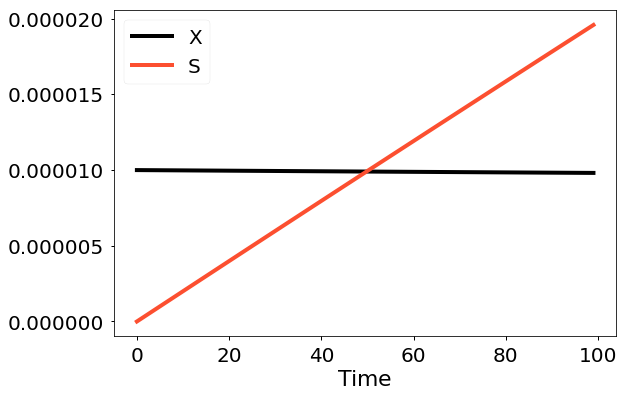

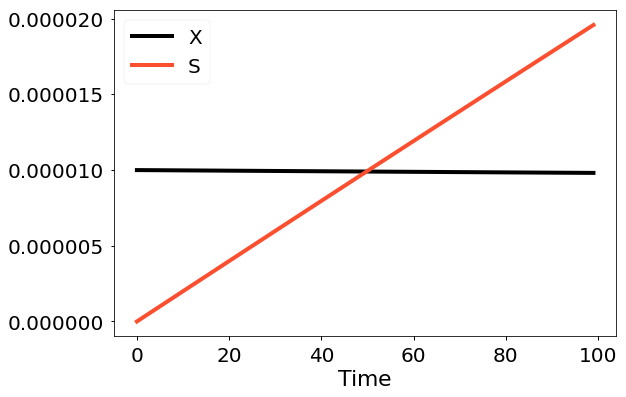

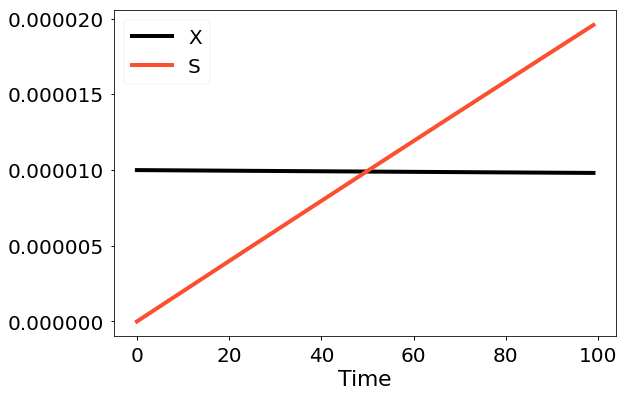

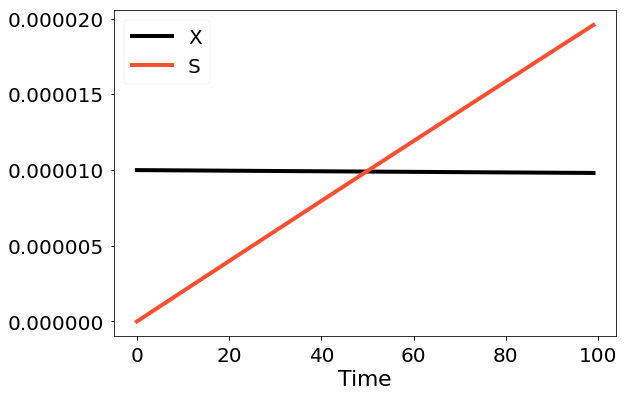

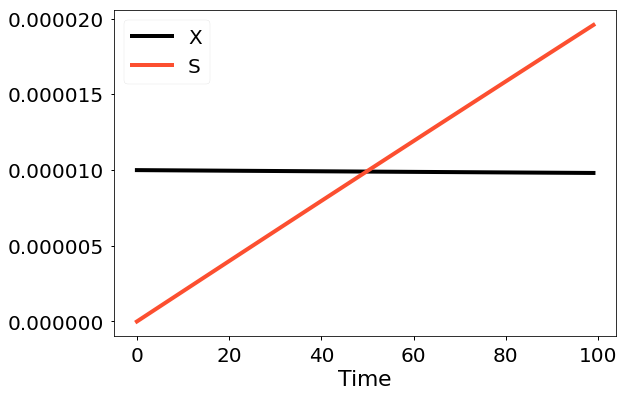

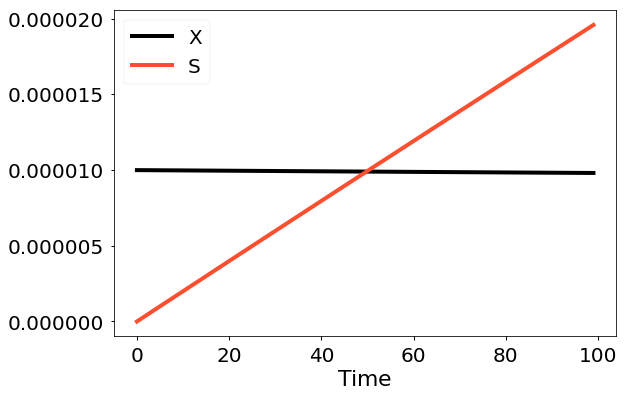

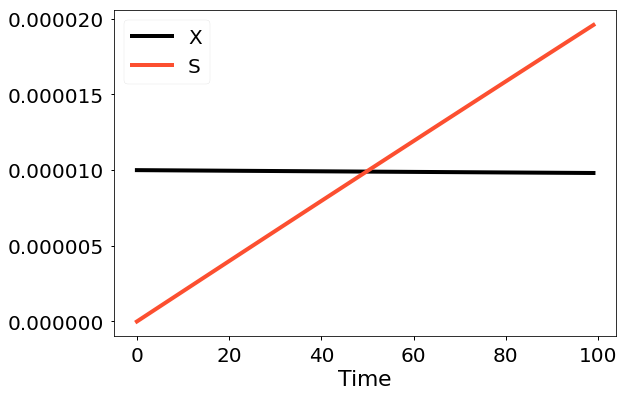

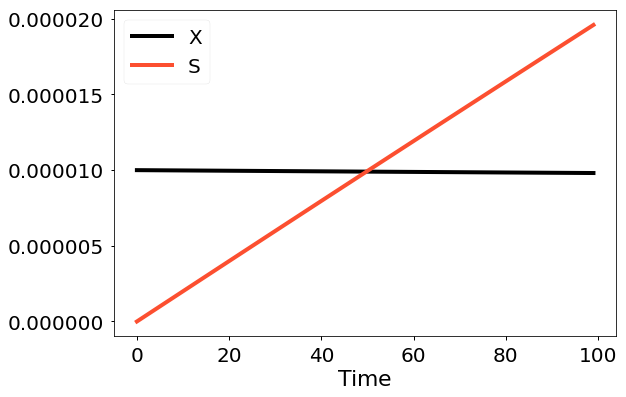

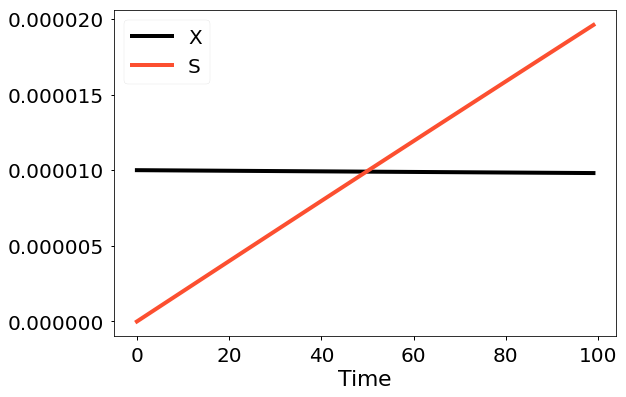

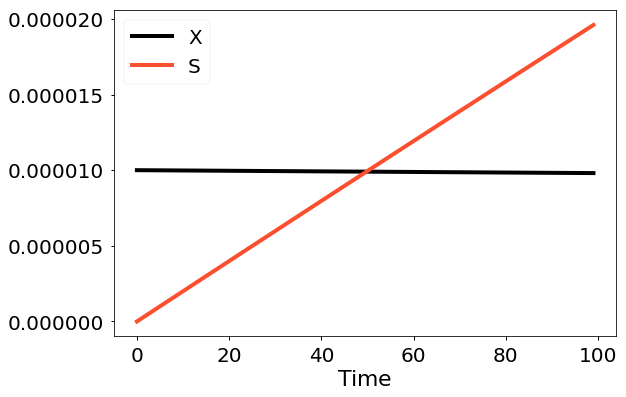

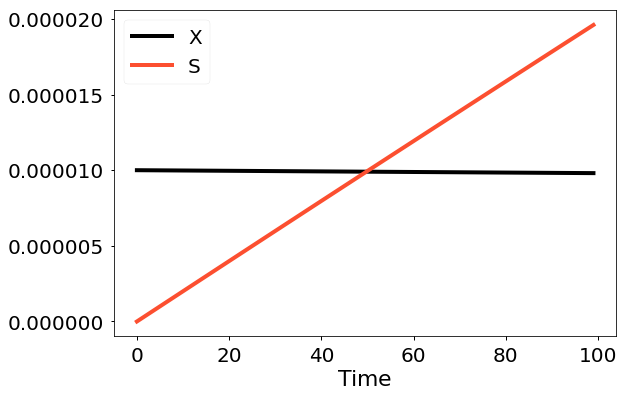

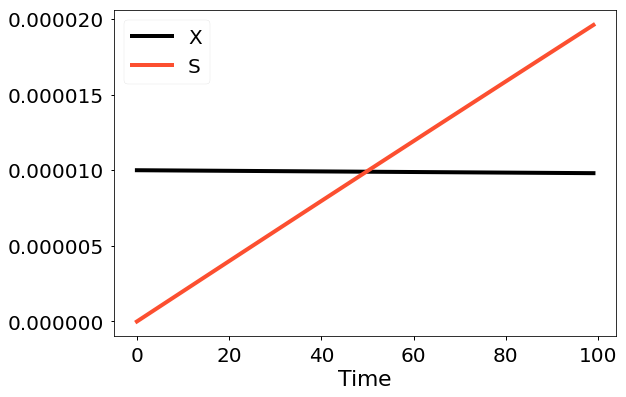

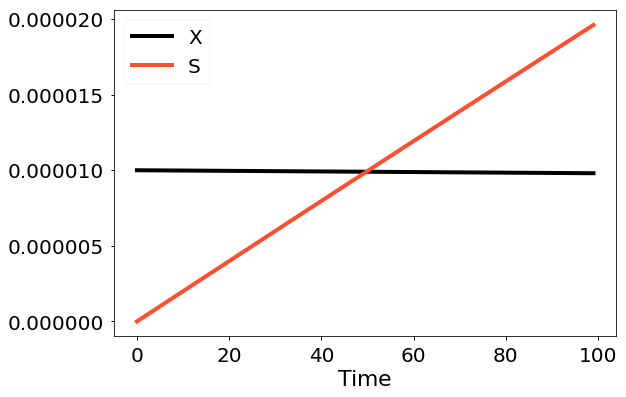

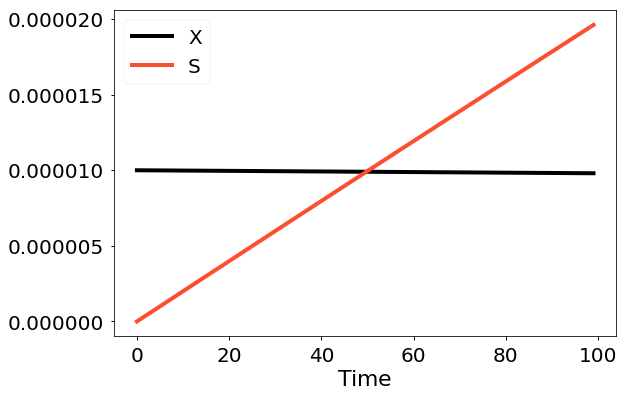

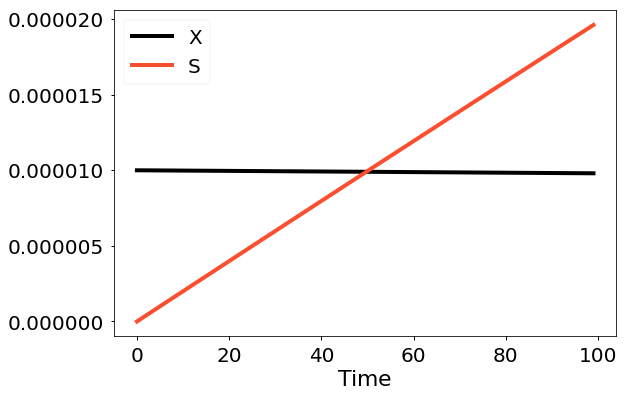

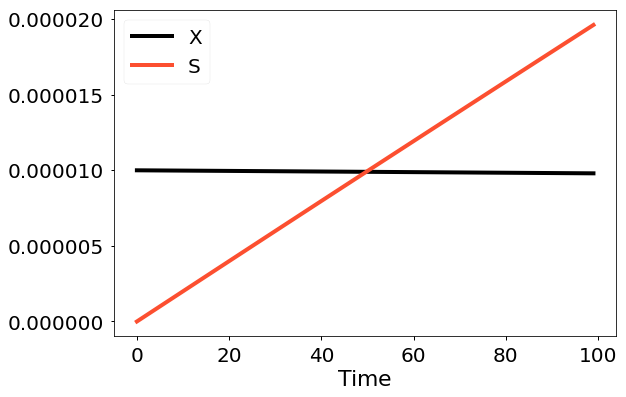

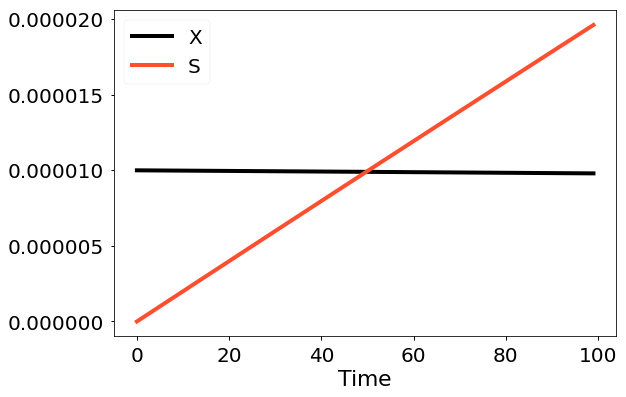

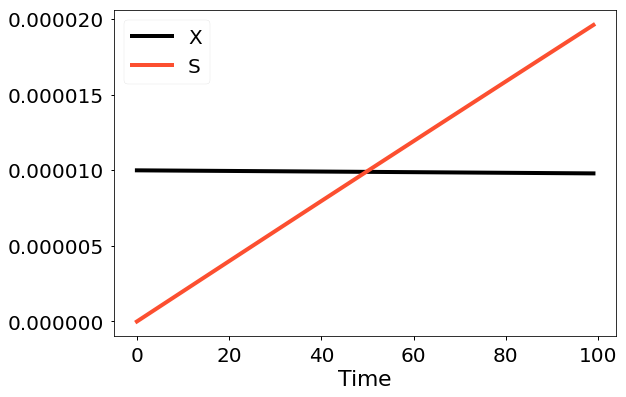

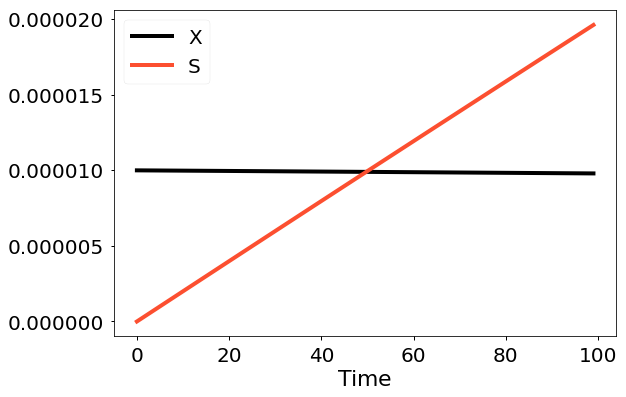

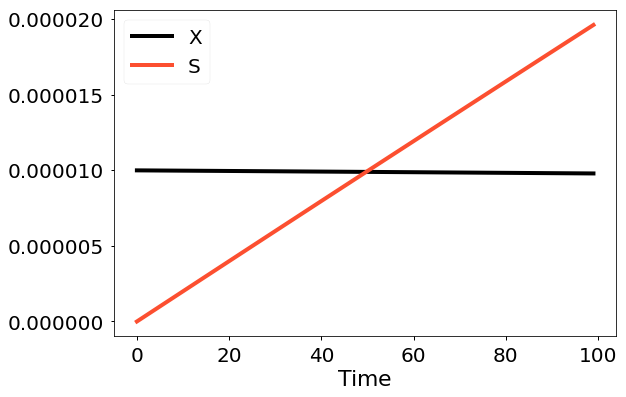

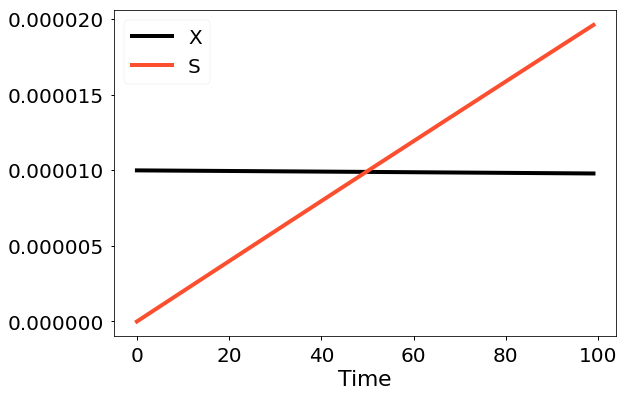

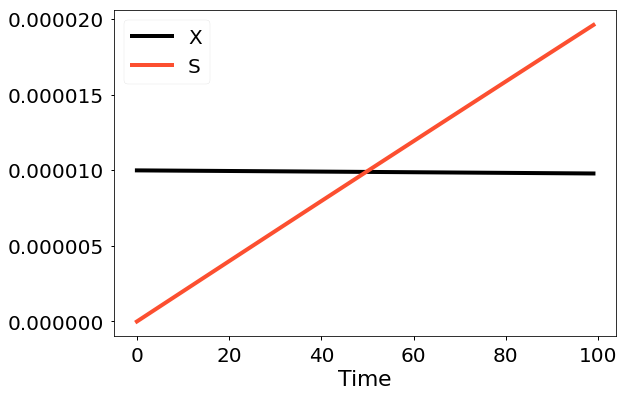

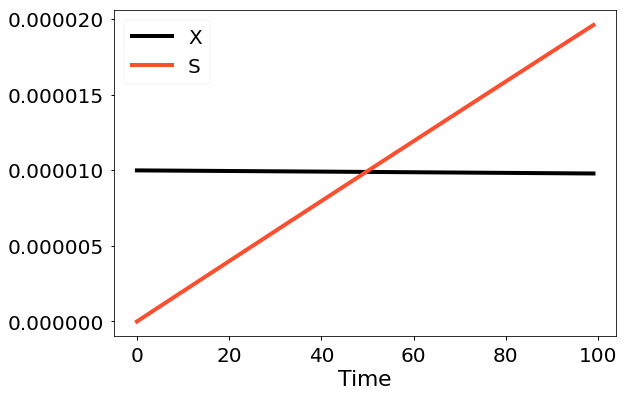

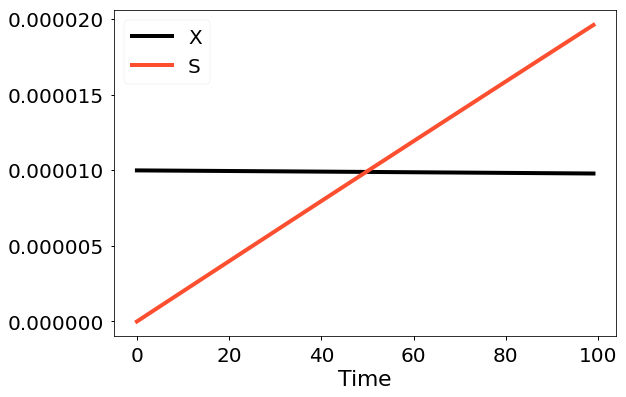

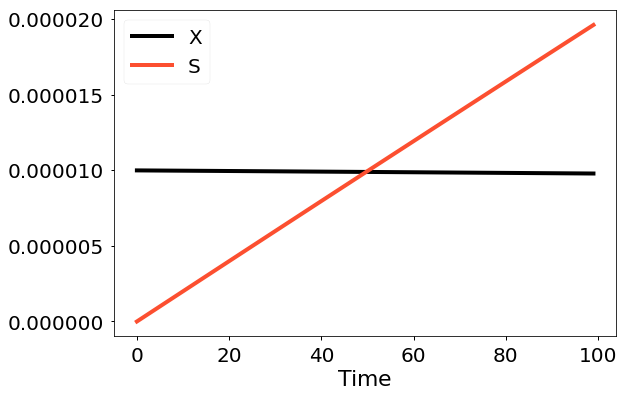

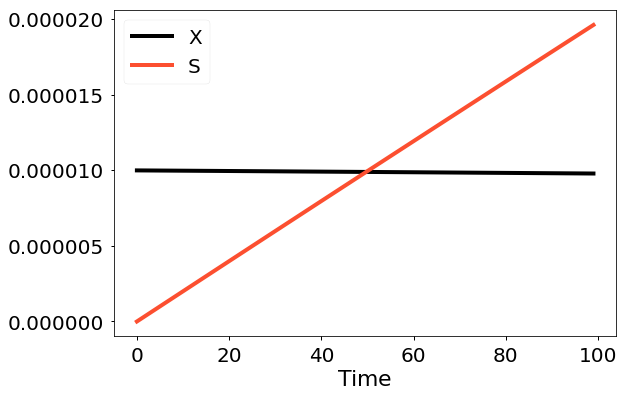

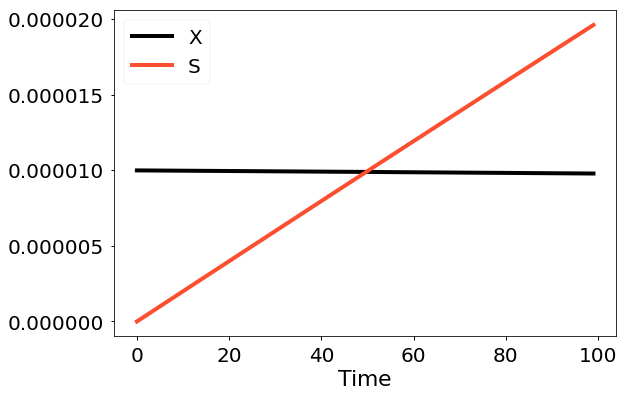

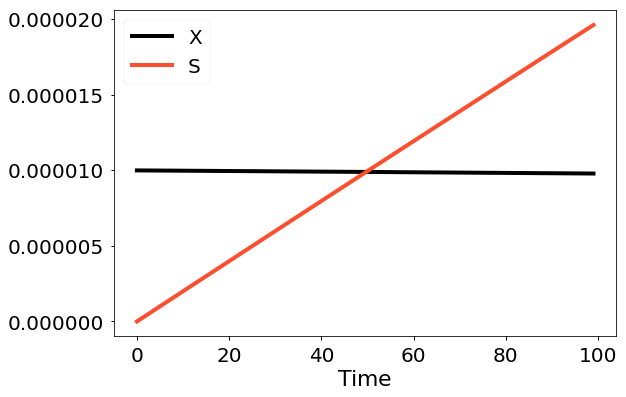

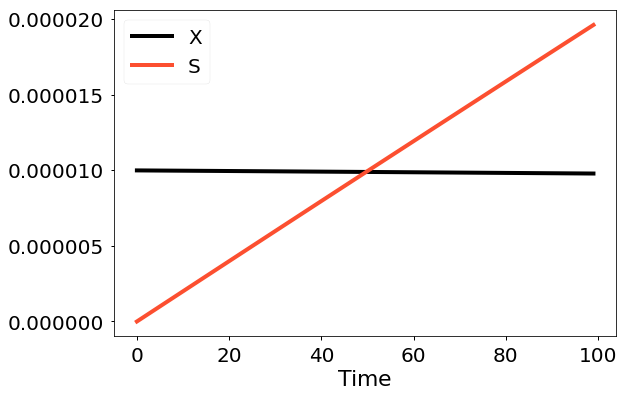

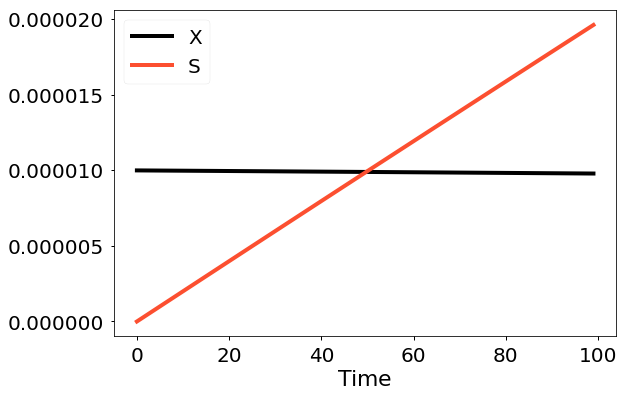

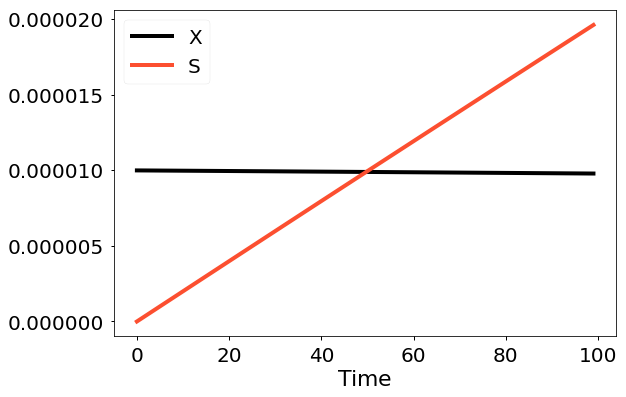

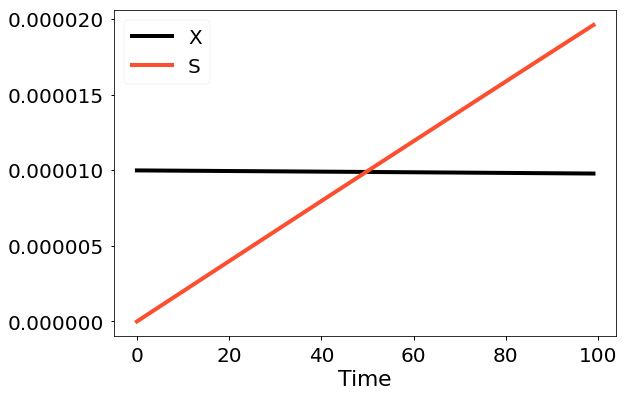

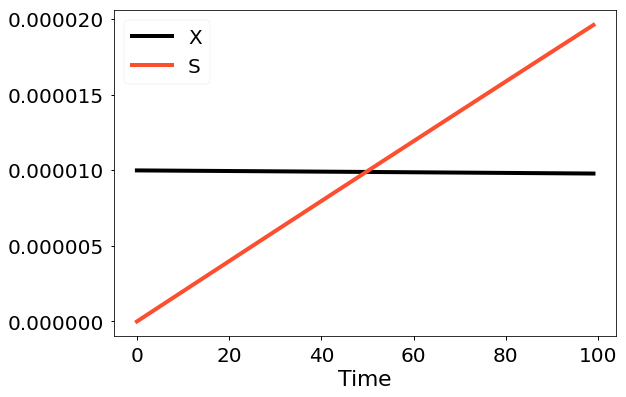

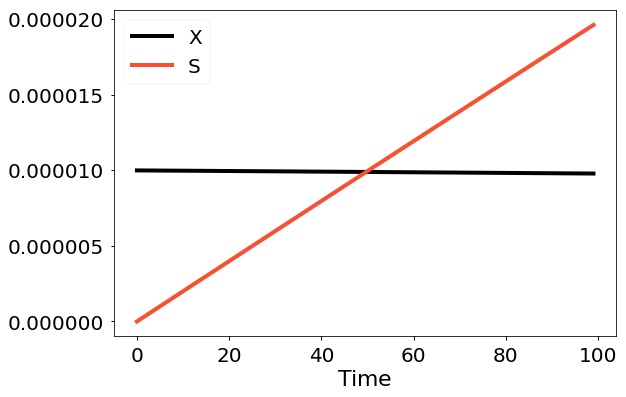

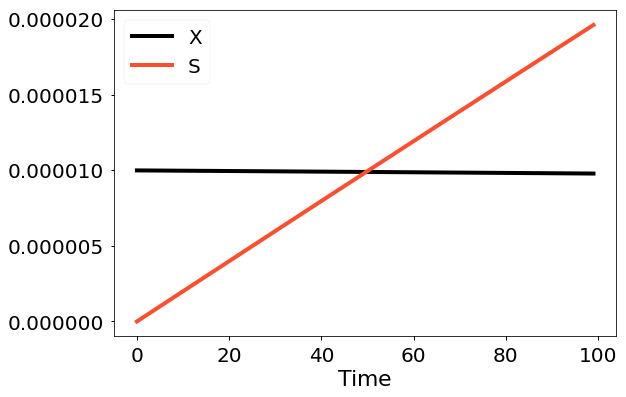

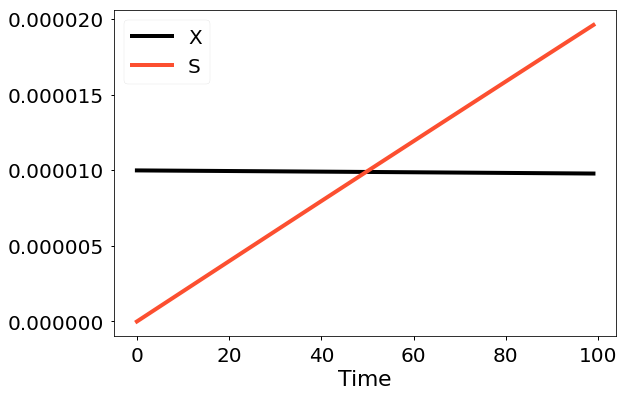

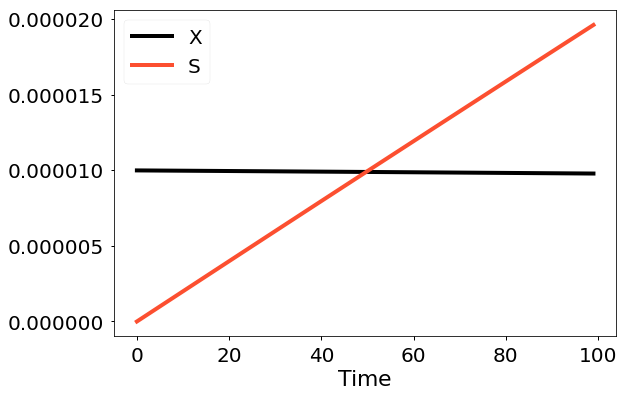

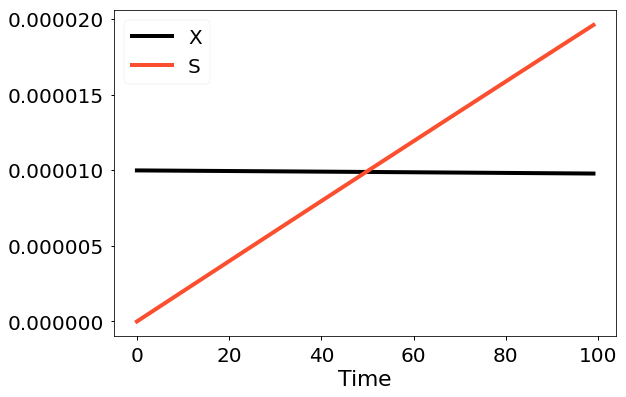

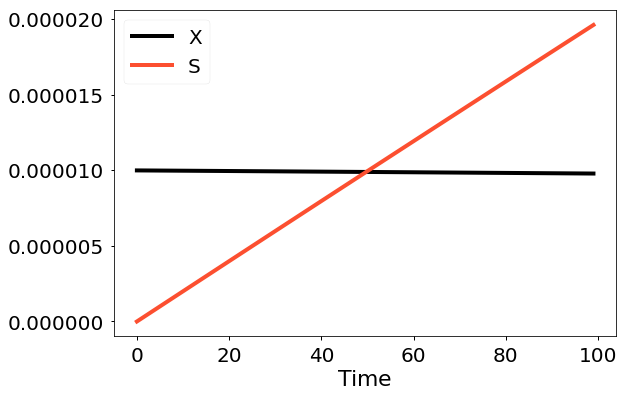

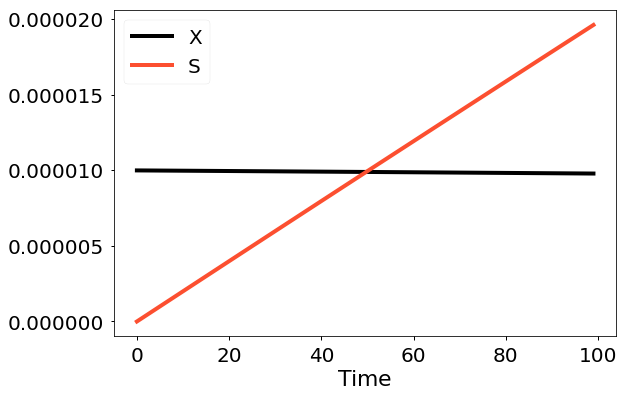

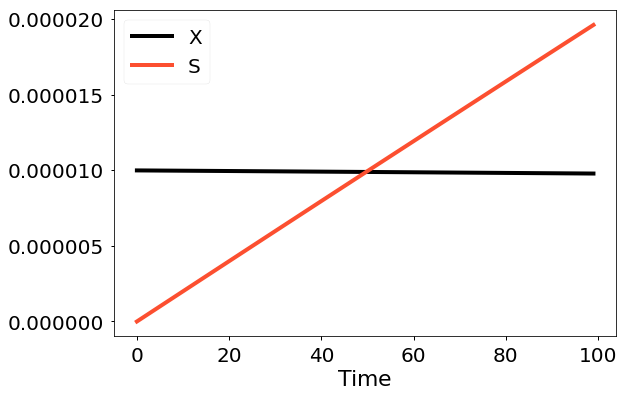

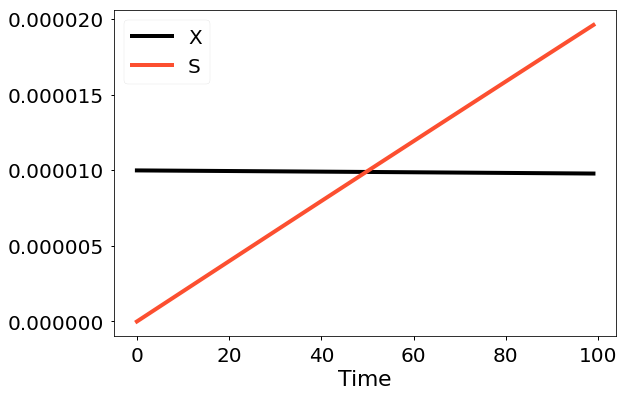

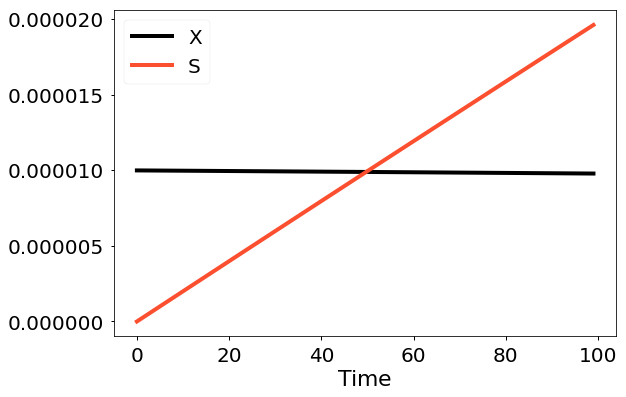

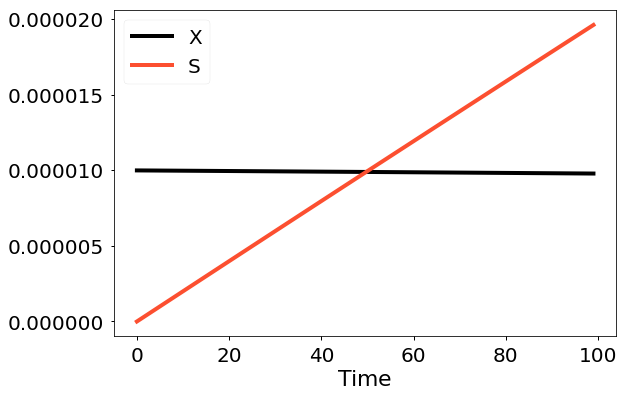

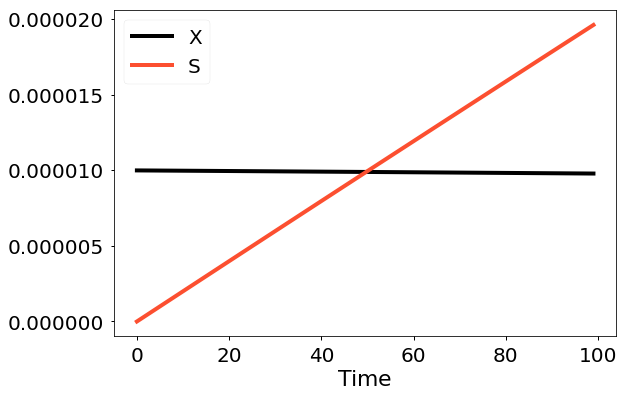

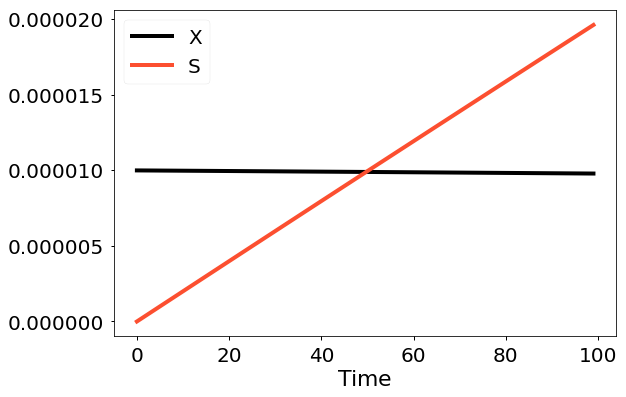

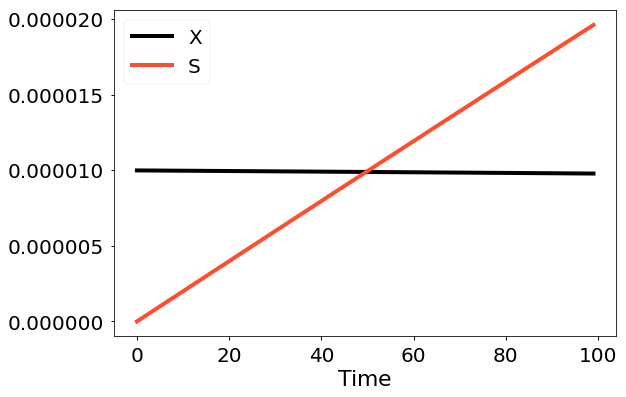

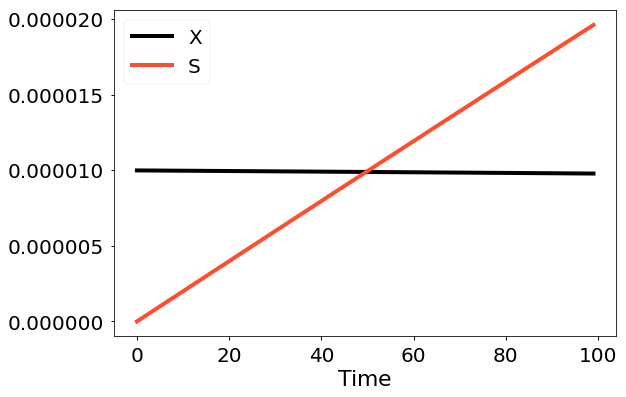

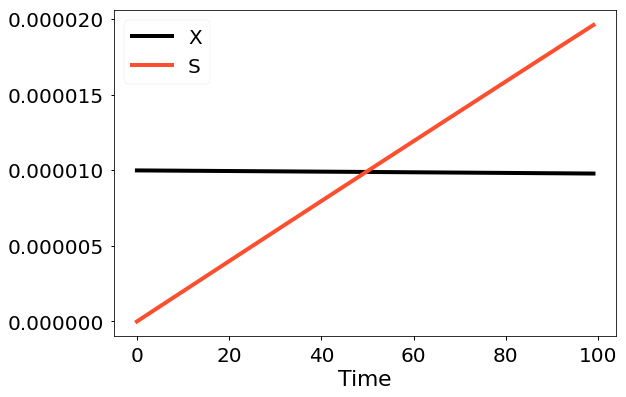

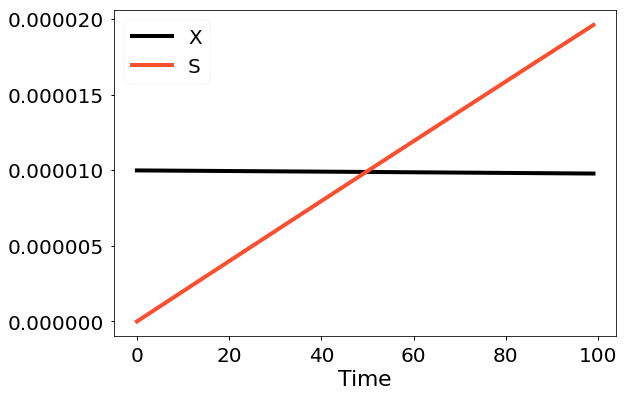

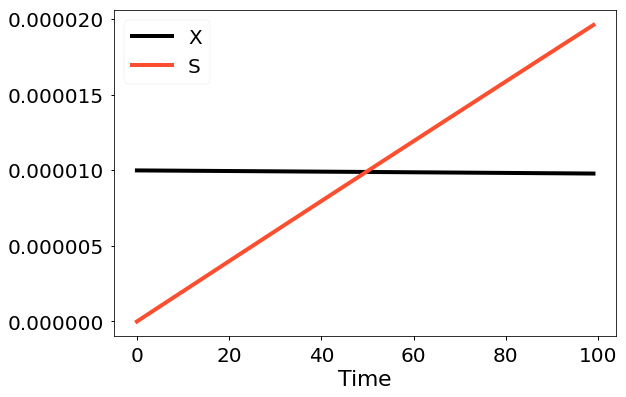

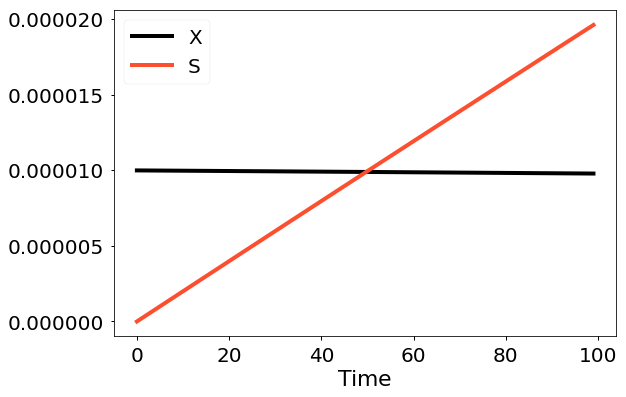

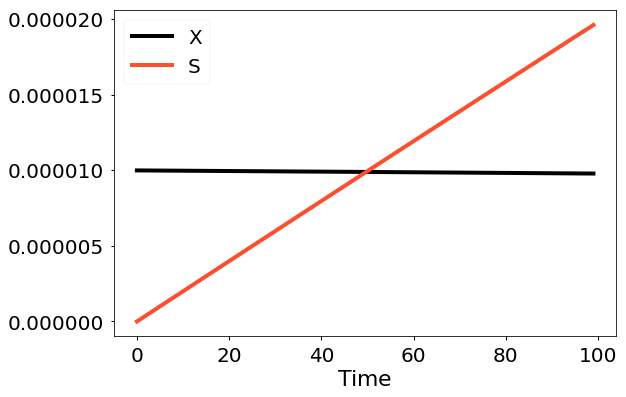

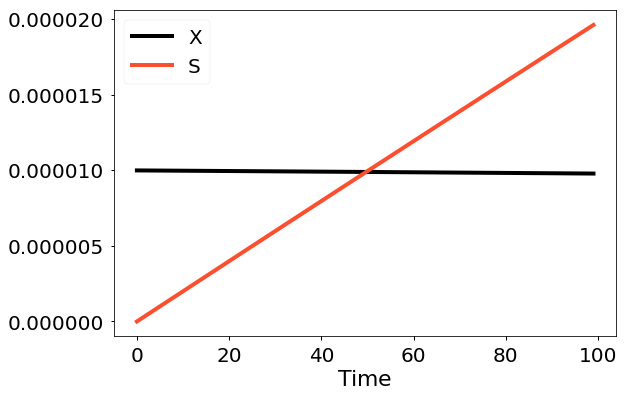

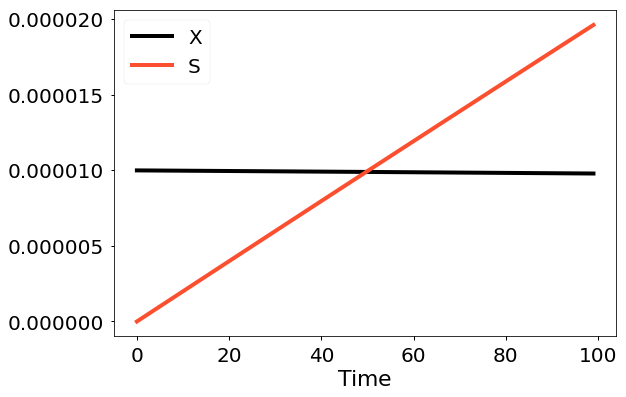

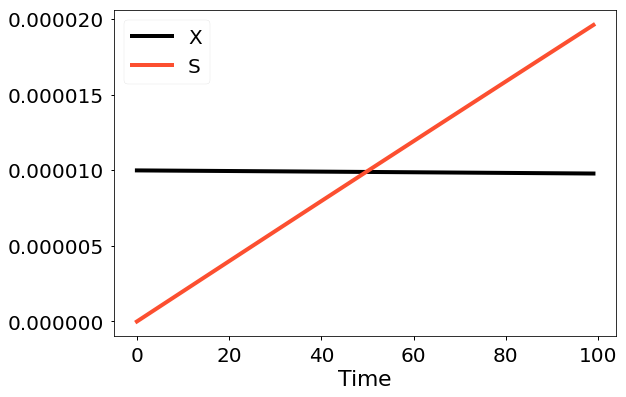

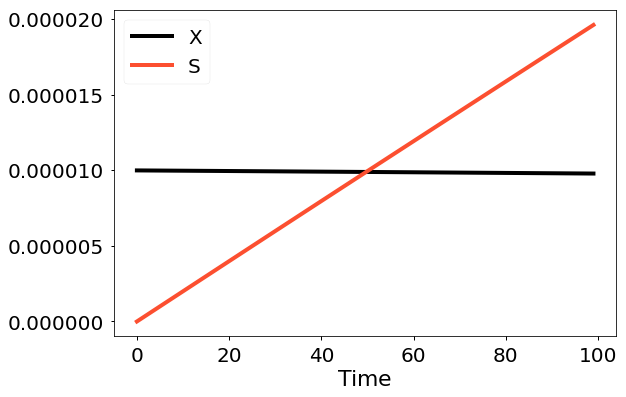

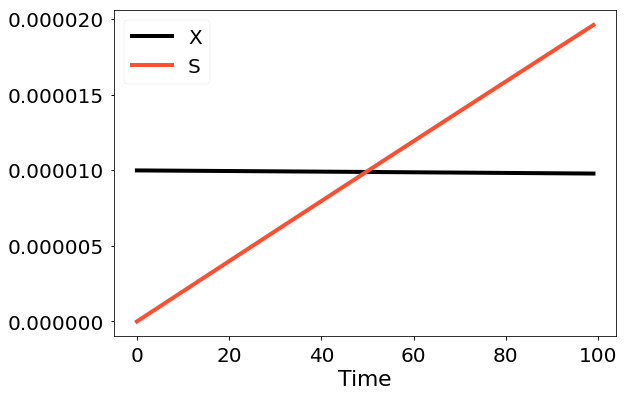

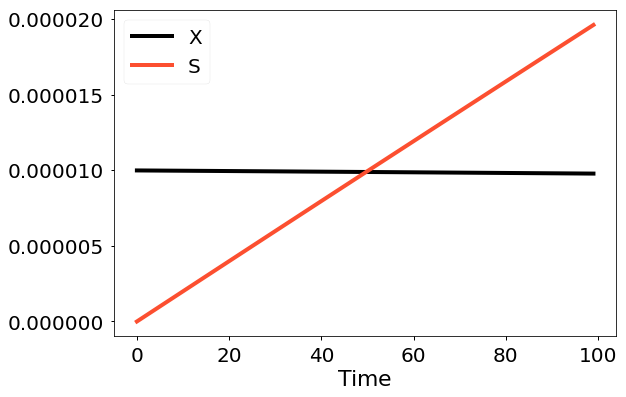

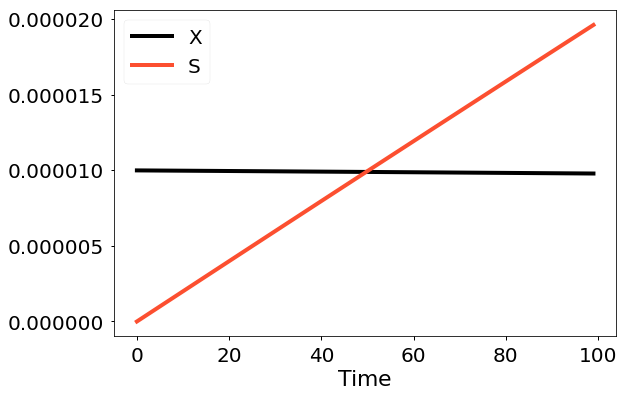

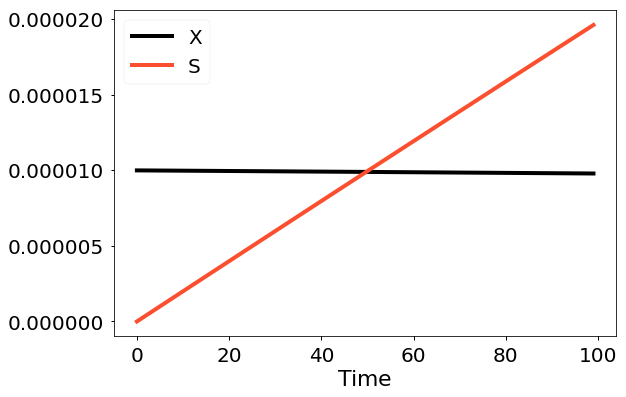

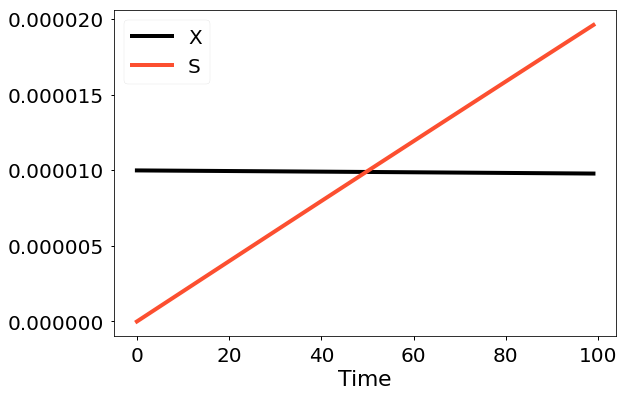

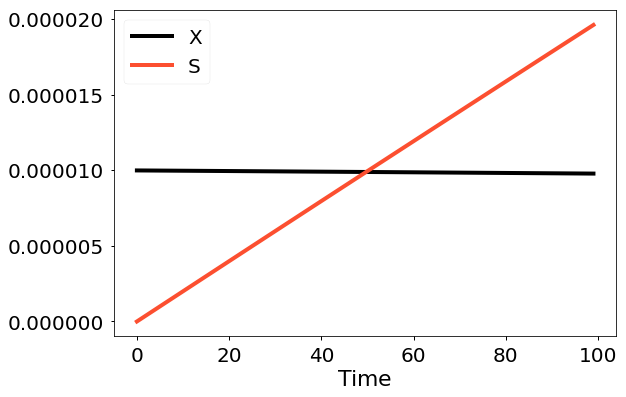

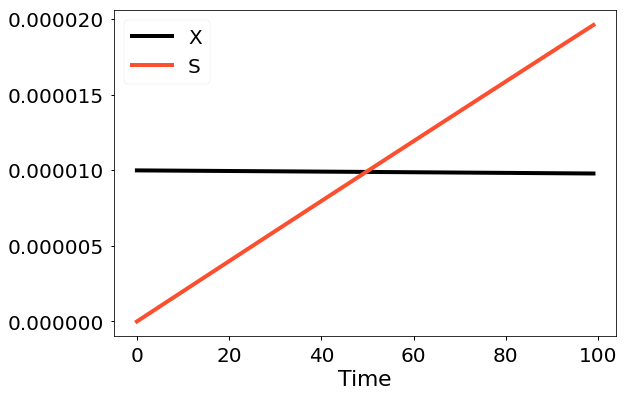

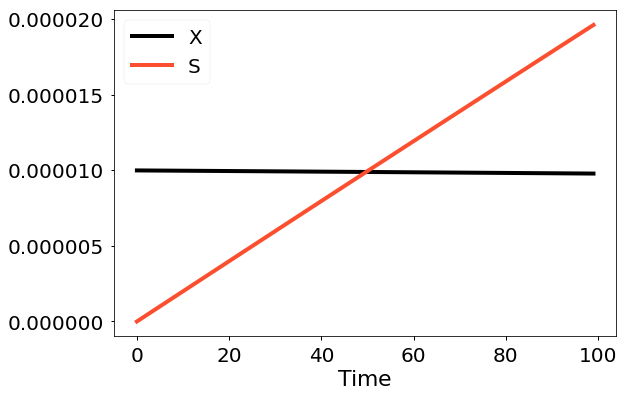

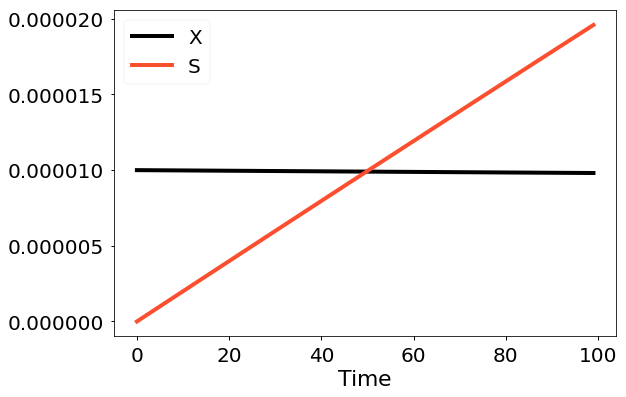

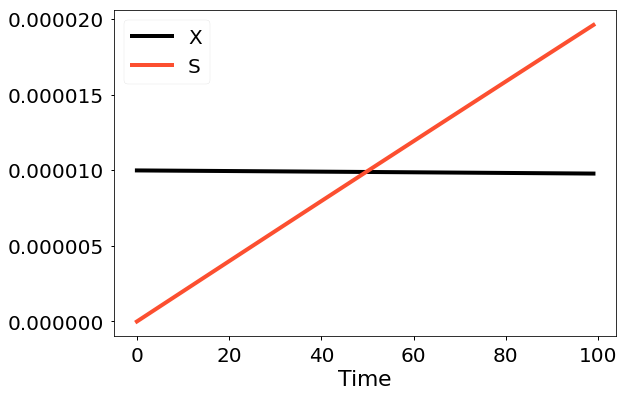

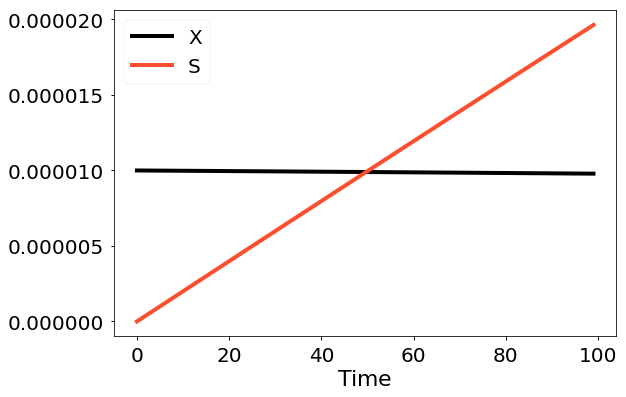

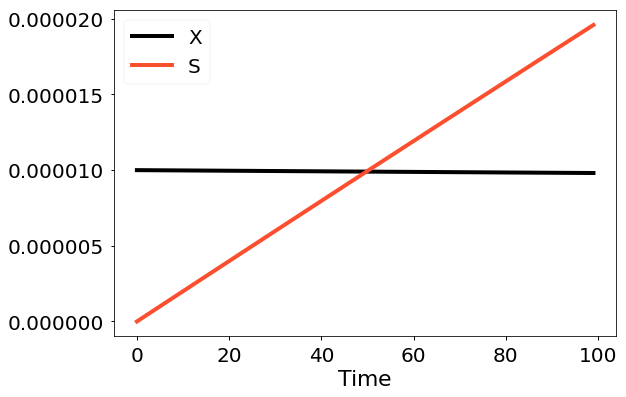

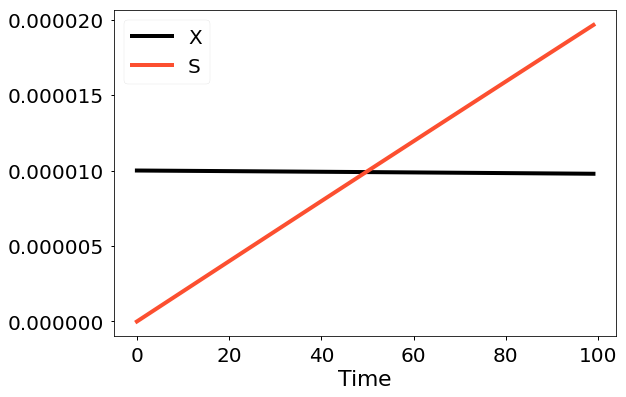

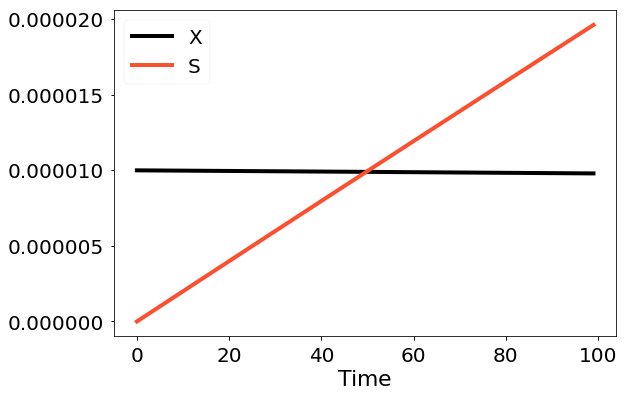

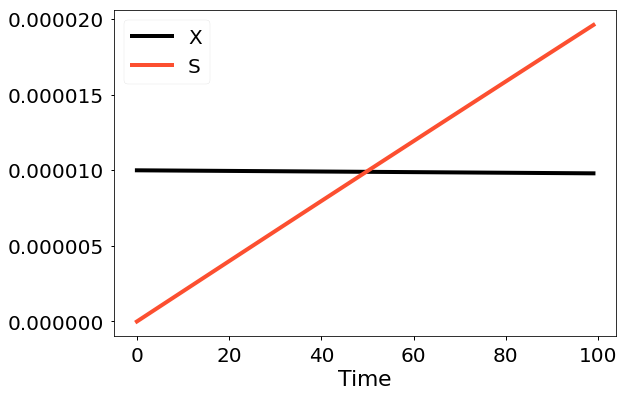

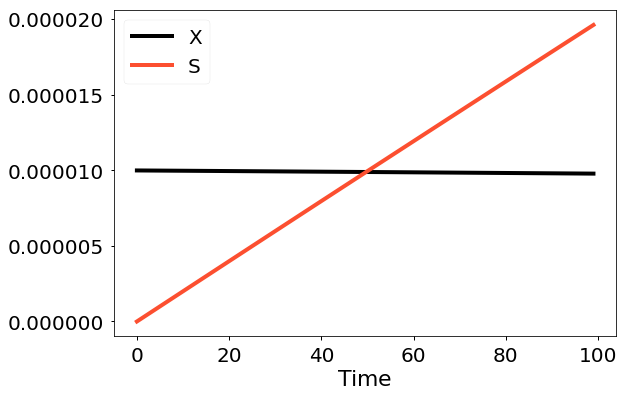

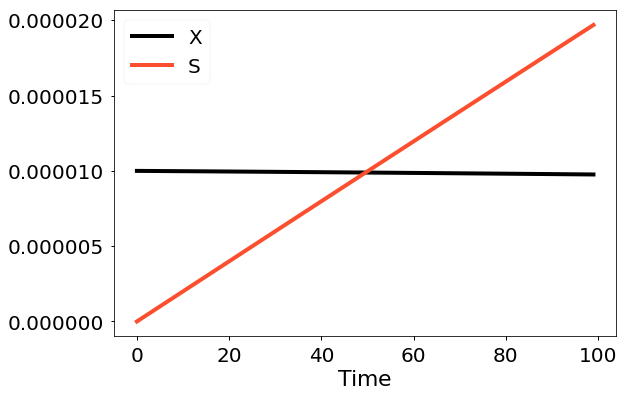

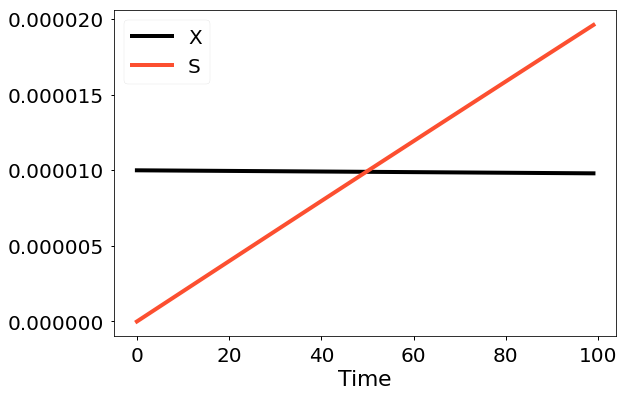

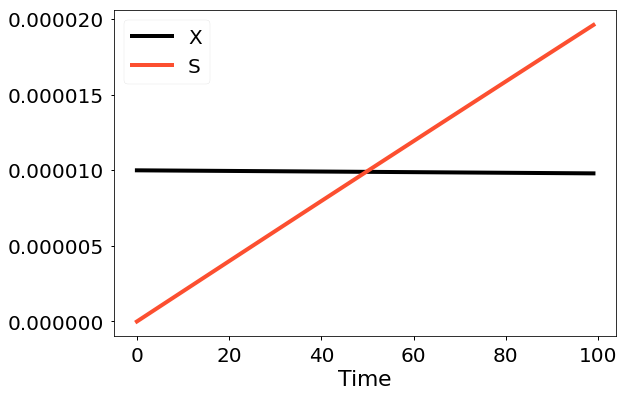

In [11]:
'''
x0 = [1, 1]
parameters,results = general_functions.track_calib(optimizer,
    x0, param_names=['mu_max', 'K_S'], method='Nelder-Mead')
interact(general_functions.plot_calib,
         parameters=fixed(parameters), results=fixed(results),
         i=IntSlider(value=0, min=0, max=parameters.shape[0]-1, step=1, continuous_update=False),
         data=fixed(df_noisy), sim_model=fixed(sim_model))
#general_functions.plot_calib(parameters, results, parameters.shape[0]-1, df_noisy)
'''

In [ ]:
'''
general_functions.plot_contour_monod(optimizer)
'''